# OSNAP line Lagrangian particle tracking investigation of the cold/fresh blob


redo other sourcetime calculation because it was wrong first time round

## Technical preamble

In [1]:
# import matplotlib.colors as colors
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
import seaborn as sns
# from matplotlib.colors import ListedColormap
import cmocean as co
import pandas as pd
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy
import seawater as sw

from matplotlib import colors as c
from matplotlib import ticker
# from xhistogram.xarray import histogram

In [2]:
sns.set(style="darkgrid")

xr.set_options(keep_attrs=True)
np.warnings.filterwarnings('ignore')

sns.set_palette("colorblind")
xr.set_options(keep_attrs=True);

plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=14) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend
plt.rc('savefig', dpi=300)       # higher res outputs

In [3]:
# from dask.distributed import Client

In [4]:
# client = Client(n_workers=1, threads_per_worker=8, memory_limit=48e9)
# client

_(Click on the link above if you want to see the Dask cluster in action.)_

## Set up paths and read in trajectory data

In [66]:
# parameters
project_path = Path.cwd() / '..' / '..' 
project_path = project_path.resolve()

interim_data_path = Path('/data/spg_fresh_blob_202104_data/2022-02-27_wr-final-runs/data/interim/endtracks/plusDist/')

outputPath = Path('data/interim/sumsAndMeans/')
output_data_path = project_path / outputPath

sectionPath = Path('data/external/')
sectionFilename = 'osnap_pos_wp.txt'
sectionname = 'osnap'

figure_path = Path('reports/figures/subsets/')

# output figures path
figures_path = Path("reports/figures/ColdBlob/final/")

# do this year-by-year because of filesizes
year = 2019

nsubsets = 32

# proportion of data in subset
subset = 1.0

## Load VIKING20X data

We'll first find all the relevant files and then open them as a virtual contiguous dataset.

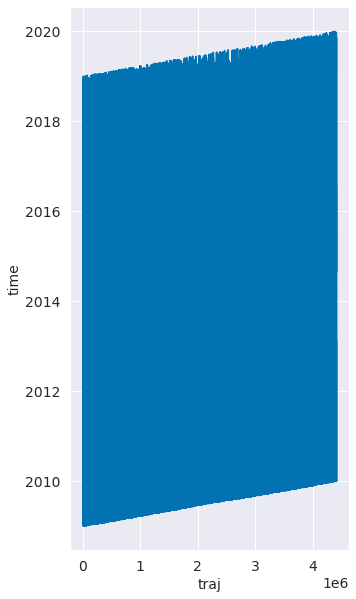

In [67]:
plt.figure(figsize=(5,10))
for year in range(year,year+1):
    yearstr=str(year)
    data_trackends_subsets = list(sorted(Path(interim_data_path).glob(f"*{yearstr}*.nc/")))
    ds = xr.concat(
        [xr.open_dataset(store) for store in data_trackends_subsets],
        dim="traj",
    )
    
    ds.time.isel(ends=1).plot()

In [7]:
conda list

# packages in environment at /opt/tljh/user/envs/parcels-container_2021.09.29-09ab0ce:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       1_gnu    conda-forge
ansiwrap                  0.8.4                      py_0    conda-forge
appdirs                   1.4.4              pyh9f0ad1d_0    conda-forge
asciitree                 0.3.3                      py_2    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     21.2.0             pyhd8ed1ab_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.4              pyhd8ed1ab_0    conda-forge
basemap                   1.2.2            py39h523bb60_3    conda-forge
binutils_impl_linux-64    2.36.1     